In [4]:
import tensorflow as tf
import keras
import pathlib
from tensorflow.keras import layers  # Ensure layers are properly imported
import matplotlib.pyplot as plt

# Define the directory path
sandbox_dir = pathlib.Path("../Data/Weather_Dataset")
batch_size=32
image_size=(224, 224)
# Load dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    labels='inferred',  # Automatically assign labels based on subfolder names
    label_mode='int',   # Labels as integers
    batch_size=32,      # Adjust batch size as needed
    image_size=(224, 224),  # Resize images to 224x224
    shuffle=True        # Shuffle dataset
)

# Print class names
class_names = dataset.class_names
print("Class Names:", class_names)

# Iterate through a batch of images and labels
for images, labels in dataset.take(1):
    print(f"Batch shape: {images.shape}, Labels: {labels.numpy()}")

Found 6862 files belonging to 11 classes.
Class Names: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Batch shape: (32, 224, 224, 3), Labels: [ 3  2  1  6  1  1  2  3  0  1  3  1  4  6  0  0  9  0 10  7  9  0  2  9
  6  5  9  3  3  0  0 10]


Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
Classes: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Epoch 1/10
 14/172 ━━━━━━━━━━━━━━━━━━━━ 49s 314ms/step - accuracy: 0.1411 - loss: 2.8132Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\theod\AppData\Local\Temp\ipykernel_26048\1619185991.py", line 57, in <module>
    history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler
    else:
       ^^^
  File "c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 371, in fit
  File "c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 219, in function
  File "c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\tensorflow\python\util\traceback_utils.py", line 150, in error_handler
    return fn(*args, **kwargs)
       

In [2]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 0


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import os
import cv2
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Set image dimensions
IMG_SIZE = (224, 224)

# Define dataset path
dataset_path = pathlib.Path("../Data/Weather_Dataset")

# Get class labels
class_names = sorted(os.listdir(dataset_path))
num_classes = len(class_names)
print("Classes:", class_names)

# Load pre-trained ResNet50 model (without top layer, to extract features)
feature_extractor = ResNet50(weights='imagenet', include_top=False, pooling='avg')

# Function to load images and extract features
def extract_features(directory):
    images = []
    labels = []

    i = 0

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(directory, class_name)
        if not os.path.isdir(class_dir):
            continue
        
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            i += 1
            if i % 100 == 0:
                print(i)
            try:
                # Read and preprocess image
                img = cv2.imread(img_path)
                img = cv2.resize(img, IMG_SIZE)
                img = image.img_to_array(img)
                img = np.expand_dims(img, axis=0)
                img = preprocess_input(img)

                # Extract features using ResNet50
                feature = feature_extractor.predict(img)
                images.append(feature.flatten())
                labels.append(label)
            except:
                print(f"Error processing {img_path}")

    return np.array(images), np.array(labels)

# Extract features and labels
print("extracting features...")
X, y = extract_features(dataset_path)

# Split into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

# Train Logistic Regression model
log_reg = LogisticRegression(max_iter=500, solver='lbfgs', multi_class='multinomial')
log_reg.fit(X_train, y_train)

# Predict on test data
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")  

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

Classes: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
extracting features...
1/1 [==============================] - 0s 83ms/step
100
1/1 [==============================] - 0s 88ms/step
200
1/1 [==============================] - 0s 86ms/step
300
1/1 [==============================] - 0s 82ms/step
400
1/1 [==============================] - 0s 83ms/step
500
1/1 [==============================] - 0s 84ms/step
600
1/1 [==============================] - 0s 79ms/step
700
1/1 [==============================] - 0s 85ms/step
800
1/1 [==============================] - 0s 82ms/step
900
1/1 [==============================] - 0s 83ms/step
1000
1/1 [==============================] - 0s 81ms/step
1100
1/1 [==============================] - 0s 79ms/step
Error processing ..\Data\Weather_Dataset\fogsmog\4514.jpg
1/1 [==============================] - 0s 82ms/step
1200
1/1 [==============================] - 0s 84ms/step
1300
1/1 [===============

c:\Users\theod\.conda\envs\SFPUC\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Test Accuracy: 0.8950

Classification Report:
               precision    recall  f1-score   support

         dew       0.96      0.91      0.94       140
     fogsmog       0.92      0.95      0.93       170
       frost       0.83      0.78      0.80        95
       glaze       0.76      0.84      0.80       128
        hail       0.93      0.95      0.94       118
   lightning       0.99      0.99      0.99        76
        rain       0.90      0.94      0.92       105
     rainbow       1.00      0.93      0.97        46
        rime       0.85      0.89      0.87       232
   sandstorm       0.96      0.91      0.94       138
        snow       0.86      0.77      0.82       124

    accuracy                           0.90      1372
   macro avg       0.91      0.90      0.90      1372
weighted avg       0.90      0.90      0.90      1372



In [ ]:
#Saving ResNet Weights

np.savez("weather_features.npz", X=X, y=y)

Found 6862 files belonging to 11 classes.
Using 5490 files for training.
Found 6862 files belonging to 11 classes.
Using 1372 files for validation.
Classes: ['dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'sandstorm', 'snow']
Epoch 1/10
172/172 [==============================] - 125s 698ms/step - loss: 1.7105 - accuracy: 0.4439 - val_loss: 1.2457 - val_accuracy: 0.6130
Epoch 2/10
172/172 [==============================] - 120s 697ms/step - loss: 1.2615 - accuracy: 0.5823 - val_loss: 1.0778 - val_accuracy: 0.6567
Epoch 3/10
172/172 [==============================] - 123s 718ms/step - loss: 1.1109 - accuracy: 0.6319 - val_loss: 0.9812 - val_accuracy: 0.6742
Epoch 4/10
172/172 [==============================] - 121s 703ms/step - loss: 1.0269 - accuracy: 0.6658 - val_loss: 1.2004 - val_accuracy: 0.6246
Epoch 5/10
172/172 [==============================] - 120s 697ms/step - loss: 0.8837 - accuracy: 0.7058 - val_loss: 0.9191 - val_accuracy: 0.6953
Epoch 6

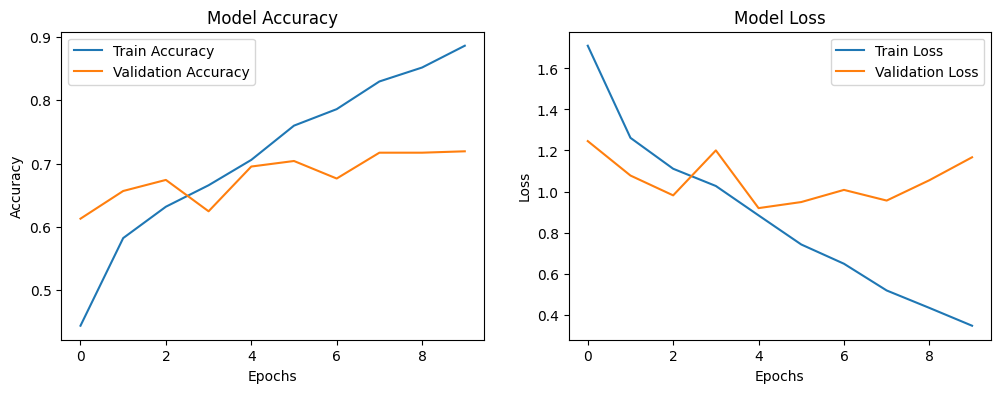

In [ ]:
# Load training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    validation_split=0.2,
    subset="training",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size
)

# Load validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
    sandbox_dir,
    validation_split=0.2,
    subset="validation",
    seed=1234,
    image_size=image_size,
    batch_size=batch_size
)

# Get class names
class_names = train_ds.class_names
num_classes = len(class_names)
print("Classes:", class_names)

# Normalize dataset
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.map(lambda x, y: (x / 255.0, y)).cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.map(lambda x, y: (x / 255.0, y)).cache().prefetch(buffer_size=AUTOTUNE)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D(2, 2),
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Helps prevent overfitting
    layers.Dense(num_classes, activation='softmax')  # Multi-class classification
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
epochs = 10  # Adjust epochs for better performance
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

# Plot training results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')

plt.show()   